<a href="https://colab.research.google.com/github/Jyoti-Hajjargi/Flight-delay-prediction/blob/main/Flight_Delay_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Enhances visualization with statistical graphing.
import missingno as msno #Helps visualize missing values in datasets.
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap #Used for interactive geographical maps.

# Loading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Airline Dataset.csv to Airline Dataset (2).csv


In [ ]:
df=pd.read_csv('Airline Dataset.csv')
df.head(5)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [ ]:
# Prints the number of rows and columns.
df.shape

(98619, 15)

# Checking for Missing Values & Data Types

In [ ]:
# Checking for NULL values in the dataset:
df.isnull().sum()

,0
Passenger ID,0
First Name,0
Last Name,0
Gender,0
Age,0
Nationality,0
Airport Name,0
Airport Country Code,0
Country Name,0
Airport Continent,0


In [ ]:
# Getting Datatype of each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

# Exploratory Data Analysis (EDA)

First Name, Last Name and Passenger ID doesn't hold any significance so dropping thse column

In [ ]:
df=df.drop(['Passenger ID', 'First Name','Last Name'], axis=1)

In [ ]:
df.head()

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [ ]:
#Extracts unique values in Gender
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
#Counts occurrences of each gender.
data=df['Gender'].value_counts().reset_index()
data

,Gender,count
0,Male,49598
1,Female,49021


In [ ]:
#Uses plotly to generate a bar chart.
fig=px.bar(data,x='Gender',y='count',color='Gender',color_discrete_sequence=px.colors.sequential.Agsunset,template = 'plotly_dark')
fig.update_layout(title_text='Number of Males & Females', xaxis_title='GENDER', yaxis_title='COUNT')
fig.show()

- Equal Number of Males and Females: Both genders have almost the same count.
- Large Dataset: The data includes a lot of people.
- Clear Gender Groups: The chart shows a clear difference between males and females.
- Useful for Analysis: Since both groups are balanced, we can compare their travel patterns easily.

Nationality

In [ ]:
# Finding unique nationality
df['Nationality'].unique()

array(['Japan', 'Nicaragua', 'Russia', 'China', 'Brazil', 'Ivory Coast',
       'Vietnam', 'Palestinian Territory', 'Thailand', 'Tunisia',
       'Sweden', 'Colombia', 'Greece', 'Philippines', 'Ukraine',
       'Indonesia', 'Croatia', 'Democratic Republic of the Congo',
       'France', 'Peru', 'Latvia', 'Germany', 'Czech Republic', 'Ireland',
       'Iran', 'Madagascar', 'United States', 'Ghana', 'Mali',
       'Guatemala', 'Kyrgyzstan', 'Haiti', 'Afghanistan', 'Ethiopia',
       'Tanzania', 'Nigeria', 'Cameroon', 'Morocco', 'Armenia', 'Mexico',
       'Chile', 'Albania', 'Luxembourg', 'Honduras', 'Portugal',
       'Kazakhstan', 'Pakistan', 'Poland', 'South Africa', 'Kenya',
       'Serbia', 'Maldives', 'Argentina', 'Uruguay', 'Netherlands',
       'Botswana', 'Egypt', 'Syria', 'Myanmar', 'Slovenia', 'Spain',
       'Macedonia', 'Mongolia', 'Yemen', 'Benin', 'Laos', 'Norway',
       'Sao Tome and Principe', 'Venezuela', 'United Kingdom', 'Denmark',
       'Dominican Republic', 'North

In [ ]:
# counting the number of unique nationality
df['Nationality'].nunique()

240

In [ ]:
#Counts occurrences of nationalities.
nation_count=df['Nationality'].value_counts().reset_index()
nation_count

,Nationality,count
0,China,18317
1,Indonesia,10559
2,Russia,5693
3,Philippines,5239
4,Brazil,3791
...,...,...
235,Romania,2
236,British Virgin Islands,2
237,Jersey,1
238,Norfolk Island,1


In [ ]:
top_10_countries=nation_count.nlargest(10,'count') #Extracts the top 10 most common ones.
top_10_countries.reset_index()
top_10_countries

,Nationality,count
0,China,18317
1,Indonesia,10559
2,Russia,5693
3,Philippines,5239
4,Brazil,3791
5,Portugal,3299
6,Poland,3245
7,France,2907
8,Sweden,2397
9,United States,2105


In [ ]:
# Plotting Highest number of Passanger Nationalities
px.bar(top_10_countries,x='Nationality',y='count',color='Nationality',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

- China has the most travelers – The highest number of people in the dataset are from China.
- Indonesia is second – After China, Indonesia has the next highest number of travelers.
-Other countries have fewer travelers – Countries like Russia, the Philippines, and Brazil have lower counts.
- The U.S. has the least in this list – Among the top 10 nationalities shown, the United States has the lowest count.

In [ ]:
#  counting the Lowest number of Passanger Nationalities
lowest_10_countries=nation_count.nsmallest(10,'count')
lowest_10_countries.reset_index()
lowest_10_countries

,Nationality,count
237,Jersey,1
238,Norfolk Island,1
239,Sint Maarten,1
228,French Southern Territories,2
229,Svalbard and Jan Mayen,2
230,Saint Helena,2
231,Macao,2
232,Saint Martin,2
233,Cook Islands,2
234,Cocos Islands,2


In [ ]:
# Plotting Lowest number of Passanger Nationalities
px.bar(lowest_10_countries,x='Nationality',y='count',color='Nationality',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

- Very few people – These countries have the least number of travelers.
- Mostly islands – Many of these are small islands or territories.
- Only 1 or 2 travelers – Each country has only 1 or 2 people in the data.
- No big countries – Large countries like the U.S. or China are missing here.








Age Distribution

<Axes: xlabel='Age', ylabel='Density'>

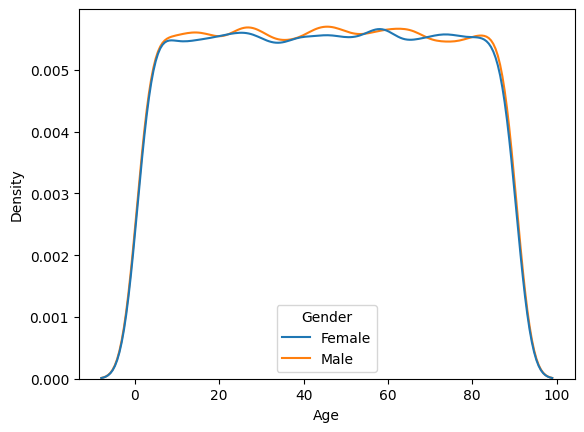

In [ ]:
#Plots a Kernel Density Estimation (KDE) curve to show the age distribution.
from seaborn import kdeplot
kdeplot(data=df, x='Age', hue='Gender')

- Age is evenly spread – Most passengers are between 10 and 80 years old.
- Few very young or old travelers – Almost no passengers below 10 or above 90.
- Males & females are similar – Their age distributions look almost the same.
- Slight difference – Males have a slightly higher density in some age groups.








In [ ]:
df.head()

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


Airport Name (From where Passengers Departure & Arrive)

In [ ]:
df['Airport Name'].unique()

array(['Coldfoot Airport', 'Kugluktuk Airport', 'Grenoble-Isère Airport',
       ..., 'Camaxilo Airport', 'Babelthuap Airport',
       'Westchester County Airport'], dtype=object)

In [ ]:
df['Airport Name'].nunique()

9062

In [ ]:
airport_name=df['Airport Name'].value_counts().reset_index()
airport_name

,Airport Name,count
0,San Pedro Airport,43
1,Santa Maria Airport,38
2,Böblingen Flugfeld,36
3,Santa Ana Airport,35
4,San Fernando Airport,31
...,...,...
9057,Balıkesir Merkez Airport,2
9058,Arkalyk North Airport,2
9059,Juba International Airport,2
9060,Falcon State Airport,1


Top 10 Airports with highest passengers

In [ ]:
top10=airport_name.nlargest(10,'count')
top10

,Airport Name,count
0,San Pedro Airport,43
1,Santa Maria Airport,38
2,Böblingen Flugfeld,36
3,Santa Ana Airport,35
4,San Fernando Airport,31
5,Mae Hong Son Airport,29
6,Capital City Airport,28
7,Cochrane Airport,28
8,Santa Rosa Airport,28
9,Bathurst Airport,27


In [ ]:
px.bar(top10,x='count',y='Airport Name',color='Airport Name',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

- San Pedro Airport has the most passengers – It has the highest count in this list.
- Other airports have similar numbers – Most airports have nearly the same passenger count.
- Bathurst Airport has the least – It has the lowest count among these 10.
- Small difference between top airports – The top 3 airports have slightly more passengers than the rest.

10 Airports with lowest passengers

In [ ]:
bottom10=airport_name.nsmallest(10,'count')
bottom10

,Airport Name,count
9060,Falcon State Airport,1
9061,Hiroshima Airport,1
9051,Camaxilo Airport,2
9052,Mount Gambier Airport,2
9053,J F Mitchell Airport,2
9054,Kar Kar Airport,2
9055,Smolensk North Airport,2
9056,San Luis Airport,2
9057,Balıkesir Merkez Airport,2
9058,Arkalyk North Airport,2


In [ ]:
px.bar(bottom10,x='count',y='Airport Name',color='Airport Name',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

- These are the least busy airports – They have the lowest passenger counts.
- Counts are very low – Most airports here have around 1 or 2 passengers.
- Arkalık North Airport has the most in this list – It has 2 passengers, slightly more than the rest.
- Very small difference between airports – All have nearly the same number of passengers.

Countries

In [ ]:
df.head()

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [ ]:
# As airport Country code doesn't hold any significance drop it:
df=df.drop(['Airport Country Code'], axis=1)
df.head()

,Gender,Age,Nationality,Airport Name,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,Female,62,Japan,Coldfoot Airport,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,Male,67,Russia,Grenoble-Isère Airport,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,Female,71,China,Ottawa / Gatineau Airport,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,Male,21,China,Gillespie Field,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


Top countries flights

In [ ]:
country=df['Country Name'].value_counts().reset_index()
country

,Country Name,count
0,United States,22104
1,Australia,6370
2,Canada,5424
3,Brazil,4504
4,Papua New Guinea,4081
...,...,...
230,Andorra,7
231,Monaco,7
232,Nauru,7
233,Palau,5






Top 10 countries flights

In [ ]:
top10_country=country.nlargest(10,'count')
top10_country

,Country Name,count
0,United States,22104
1,Australia,6370
2,Canada,5424
3,Brazil,4504
4,Papua New Guinea,4081
5,China,2779
6,Indonesia,2358
7,Russian Federation,2247
8,Colombia,1643
9,India,1486


In [ ]:
px.bar(top10_country,x='count',y='Country Name',color='Country Name',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

- United States has the most flights – It has the highest count, much more than any other country.
- Australia and Canada follow – These two countries have the next highest flight counts but are far behind the U.S.
- Brazil and Papua New Guinea are mid-level – Their flight counts are moderate compared to the top three.
- India has the lowest in this list – Among the top 10, India has the fewest flights.

In [ ]:
df.head()

,Gender,Age,Nationality,Airport Name,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,Female,62,Japan,Coldfoot Airport,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,Male,67,Russia,Grenoble-Isère Airport,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,Female,71,China,Ottawa / Gatineau Airport,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,Male,21,China,Gillespie Field,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


Continents

In [ ]:
continent=df['Continents'].value_counts().reset_index()
continent

,Continents,count
0,North America,32033
1,Asia,18637
2,Oceania,13866
3,Europe,12335
4,Africa,11030
5,South America,10718


In [ ]:
px.bar(continent,x='count',y='Continents',color='Continents',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

- North America has the most flights – More than any other continent.
- Asia comes next – It has the second-highest number of flights.
- Oceania, Europe, and Africa are in the middle – They have a similar number of flights.
- South America has the least – It has the fewest flights among all continents.








Flight Status

In [ ]:
status=df['Flight Status'].value_counts().reset_index()
status

,Flight Status,count
0,Cancelled,32942
1,On Time,32846
2,Delayed,32831


In [ ]:
px.bar(status,x='Flight Status',y='count',color='Flight Status',color_discrete_sequence=px.colors.sequential.Viridis,template = 'plotly_dark')

- Almost equal flights in all three categories (Cancelled, On Time, Delayed).
- Cancelled flights are high, nearly the same as On-Time and Delayed.
- On-time flights are not much higher than delays.
- Delays and cancellations may be a serious issue for passengers

In [ ]:
# Continent =>  North America
N_America=df[df['Continents']=='North America']
N_America

,Gender,Age,Nationality,Airport Name,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,Female,62,Japan,Coldfoot Airport,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
3,Female,71,China,Ottawa / Gatineau Airport,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,Male,21,China,Gillespie Field,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time
9,Male,13,Thailand,Vermilion Airport,Canada,NAM,North America,4/6/2022,YVG,Burlie Schustl,On Time
...,...,...,...,...,...,...,...,...,...,...,...
98597,Female,38,Peru,Fort Chipewyan Airport,Canada,NAM,North America,1/10/2022,YPY,Coriss Smurfitt,On Time
98604,Female,47,Brazil,St Cloud Regional Airport,United States,NAM,North America,2/8/2022,STC,Freddie Landrean,On Time
98605,Female,7,China,Newport Municipal Airport,United States,NAM,North America,9/7/2022,ONP,Morganne Ockenden,On Time
98608,Female,24,Chile,Luis Munoz Marin International Airport,Puerto Rico,NAM,North America,3/23/2022,SJU,Clary Tribbeck,Cancelled


In [ ]:
status_na=N_America['Flight Status'].value_counts().reset_index()
status_na

,Flight Status,count
0,Delayed,10696
1,Cancelled,10693
2,On Time,10644


In [ ]:
# Continent => Asia
asia=df[df['Continents']=='Asia']
asia

,Gender,Age,Nationality,Airport Name,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
12,Female,47,Sweden,Loralai Airport,Pakistan,AS,Asia,3/19/2022,LRG,Kalie Scoble,Delayed
17,Male,12,Greece,Enshi Airport,China,AS,Asia,3/29/2022,ENH,Alvin Wenzel,Delayed
19,Male,62,China,Guilin Liangjiang International Airport,China,AS,Asia,9/5/2022,KWL,Warner Driutti,Cancelled
26,Female,14,Democratic Republic of the Congo,Bagan Airport,Myanmar,AS,Asia,10/3/2022,NYU,Julietta Delahunt,Delayed
42,Female,56,China,Rar Gwamar Airport,Indonesia,AS,Asia,7/8/2022,DOB,Rosalyn Vondrys,Delayed
...,...,...,...,...,...,...,...,...,...,...,...
98603,Male,39,Haiti,Senipah Heliport,Indonesia,AS,Asia,10/8/2022,SZH,Ephraim Yantsurev,On Time
98609,Female,22,China,Wuzhou Changzhoudao Airport,China,AS,Asia,4/23/2022,WUZ,Olimpia Arstall,On Time
98610,Male,83,France,Warangal Airport,India,AS,Asia,8/5/2022,WGC,Che Pressland,Cancelled
98611,Female,41,Canada,Ipil Airport,Philippines,AS,Asia,6/6/2022,IPE,Hadria Vacher,On Time


In [ ]:
status_as=asia['Flight Status'].value_counts().reset_index()
status_as

,Flight Status,count
0,On Time,6242
1,Cancelled,6235
2,Delayed,6160


In [ ]:
# Continent => Oceania
oceania=df[df['Continents']=='Oceania']
oceania

,Gender,Age,Nationality,Airport Name,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
13,Female,77,Russia,Cudal Airport,Australia,OC,Oceania,3/24/2022,CUG,Catriona Beaument,Delayed
30,Female,14,China,Faleolo International Airport,Samoa,OC,Oceania,7/22/2022,APW,Magdalen Claiden,Delayed
32,Male,19,Germany,Nesson Airport,New Caledonia,OC,Oceania,3/25/2022,HLU,Murvyn Duff,Cancelled
35,Male,9,Sweden,Gora Airstrip,Papua New Guinea,OC,Oceania,6/25/2022,GOC,Gardiner Ferbrache,On Time
37,Male,32,China,Moki Airport,Papua New Guinea,OC,Oceania,12/21/2022,MJJ,Dun Craythorn,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...
98538,Male,76,Indonesia,Pimaga Airport,Papua New Guinea,OC,Oceania,12/28/2022,PMP,Dru Loveridge,Delayed
98567,Female,5,Finland,Meekatharra Airport,Australia,OC,Oceania,12/9/2022,MKR,Cherri Kuhndel,Delayed
98580,Male,82,Norway,Kurwina Airport,Papua New Guinea,OC,Oceania,1/29/2022,KWV,Jase Saban,Cancelled
98589,Female,29,Brazil,Austral Downs Airport,Australia,OC,Oceania,5/29/2022,AWP,Tildy Revie,Cancelled


In [ ]:
status_oc=asia['Flight Status'].value_counts().reset_index()
status_oc

,Flight Status,count
0,On Time,6242
1,Cancelled,6235
2,Delayed,6160


In [ ]:
# Continent => Europe
eu=df[df['Continents']=='Europe']
status_eu=eu['Flight Status'].value_counts().reset_index()
status_eu

,Flight Status,count
0,Delayed,4178
1,Cancelled,4095
2,On Time,4062


In [ ]:
# Continent => Africa
af=df[df['Continents']=='Africa']
status_af=af['Flight Status'].value_counts().reset_index()
status_af

,Flight Status,count
0,On Time,3719
1,Cancelled,3657
2,Delayed,3654


In [ ]:
# Continent => South America
sa=df[df['Continents']=='South America']
status_sa=sa['Flight Status'].value_counts().reset_index()
status_sa

,Flight Status,count
0,Cancelled,3643
1,On Time,3566
2,Delayed,3509


In [ ]:
# Converting the Departure date to datetime format

df['Departure Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 98619 entries, 0 to 98618
Series name: Departure Date
Non-Null Count  Dtype 
--------------  ----- 
98619 non-null  object
dtypes: object(1)
memory usage: 770.6+ KB


In [ ]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

In [ ]:
df['Departure Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 98619 entries, 0 to 98618
Series name: Departure Date
Non-Null Count  Dtype         
--------------  -----         
98619 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 770.6 KB


In [ ]:
# Extracting the day, month and year from the departure date

df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Day_of_Week'] = df['Departure Date'].dt.dayofweek
df['Month'] = df['Departure Date'].dt.month
df

,Gender,Age,Nationality,Airport Name,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,Day_of_Week,Month
0,Female,62,Japan,Coldfoot Airport,United States,NAM,North America,2022-06-28,CXF,Edithe Leggis,On Time,1,6
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,NAM,North America,2022-12-26,YCO,Elwood Catt,On Time,0,12
2,Male,67,Russia,Grenoble-Isère Airport,France,EU,Europe,2022-01-18,GNB,Darby Felgate,On Time,1,1
3,Female,71,China,Ottawa / Gatineau Airport,Canada,NAM,North America,2022-09-16,YND,Dominica Pyle,Delayed,4,9
4,Male,21,China,Gillespie Field,United States,NAM,North America,2022-02-25,SEE,Bay Pencost,On Time,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,Male,85,China,Hasvik Airport,Norway,EU,Europe,2022-12-11,HAA,Gareth Mugford,Cancelled,6,12
98615,Female,19,Russia,Ampampamena Airport,Madagascar,AF,Africa,2022-10-30,IVA,Kasey Benedict,Cancelled,6,10
98616,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,EU,Europe,2022-09-10,ABC,Darrin Lucken,On Time,5,9
98617,Female,34,China,Gagnoa Airport,Côte d'Ivoire,AF,Africa,2022-10-26,GGN,Gayle Lievesley,Cancelled,2,10


In [ ]:
df['Day_of_Week'].unique()

array([1, 0, 4, 6, 3, 5, 2], dtype=int32)

In [ ]:
# Adding one to the day of the week to make it start from 1 instead of 0

df['Day_of_Week'] = df['Day_of_Week'] + 1

In [ ]:
df

,Gender,Age,Nationality,Airport Name,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,Day_of_Week,Month
0,Female,62,Japan,Coldfoot Airport,United States,NAM,North America,2022-06-28,CXF,Edithe Leggis,On Time,2,6
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,NAM,North America,2022-12-26,YCO,Elwood Catt,On Time,1,12
2,Male,67,Russia,Grenoble-Isère Airport,France,EU,Europe,2022-01-18,GNB,Darby Felgate,On Time,2,1
3,Female,71,China,Ottawa / Gatineau Airport,Canada,NAM,North America,2022-09-16,YND,Dominica Pyle,Delayed,5,9
4,Male,21,China,Gillespie Field,United States,NAM,North America,2022-02-25,SEE,Bay Pencost,On Time,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,Male,85,China,Hasvik Airport,Norway,EU,Europe,2022-12-11,HAA,Gareth Mugford,Cancelled,7,12
98615,Female,19,Russia,Ampampamena Airport,Madagascar,AF,Africa,2022-10-30,IVA,Kasey Benedict,Cancelled,7,10
98616,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,EU,Europe,2022-09-10,ABC,Darrin Lucken,On Time,6,9
98617,Female,34,China,Gagnoa Airport,Côte d'Ivoire,AF,Africa,2022-10-26,GGN,Gayle Lievesley,Cancelled,3,10


In [ ]:
# preparing the features

features = ['Airport Name', 'Country Name', 'Airport Continent', 'Day_of_Week', 'Month']
X = df[features].copy()

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Encoding the categorical features

le = LabelEncoder()

for _ in features:
    X[_] = le.fit_transform(X[_])

In [ ]:
X

,Airport Name,Country Name,Airport Continent,Day_of_Week,Month
0,1717,221,3,1,5
1,4228,37,3,0,11
2,3034,72,2,1,0
3,6031,37,3,4,8
4,2870,221,3,4,1
...,...,...,...,...,...
98614,3193,157,2,6,11
98615,281,124,0,6,9
98616,157,197,2,5,8
98617,2719,55,0,2,9


In [ ]:
# scaling the features

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# handling the Target variable

y = df['Flight Status'].copy().apply(lambda x: 1 if x == 'Delayed' else 0)

In [ ]:
y

,Flight Status
0,0
1,0
2,0
3,1
4,0
...,...
98614,0
98615,0
98616,0
98617,0


In [ ]:
# Split the data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Selection

In [ ]:
classifiers = {
    'XGBClassifier' : XGBClassifier(),
    'DecisionTreeCLassifier' : DecisionTreeClassifier()
}


for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'{name}:\nAccuracy = {accuracy:.2f}\n')
    print(report)
    print('=' * 80)

XGBClassifier:
Accuracy = 0.66

              precision    recall  f1-score   support

           0       0.66      0.98      0.79     13069
           1       0.35      0.02      0.03      6655

    accuracy                           0.66     19724
   macro avg       0.51      0.50      0.41     19724
weighted avg       0.56      0.66      0.54     19724

DecisionTreeCLassifier:
Accuracy = 0.55

              precision    recall  f1-score   support

           0       0.66      0.67      0.66     13069
           1       0.34      0.34      0.34      6655

    accuracy                           0.55     19724
   macro avg       0.50      0.50      0.50     19724
weighted avg       0.55      0.55      0.55     19724

